In [29]:
# Import Libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator
from ta.others import daily_return,cumulative_return
from plotly.offline import init_notebook_mode
import cufflinks as cf
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os

%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [18]:
# Get the data for the stock ^IBEX
ibex35_list = ["^IBEX","ANA.MC","ACX.MC","ACS.MC","AENA.MC","AMS.MC","MTS.MC","SAB.MC","BKT.MC","BBVA.MC","CABK.MC","CLNX.MC","COL.MC","ANE.MC","ENG.MC","ELE.MC","FER.MC","FDR.MC","GRF.MC","IAG.MC","IBE.MC","ITX.MC","IDR.MC","LOG.MC","MAP.MC","MEL.MC","MRL.MC","NTGY.MC","RED.MC","REP.MC","ROVI.MC","SCYR.MC","SAN.MC","SLR.MC","TEF.MC","UNI.MC"]

for stock in ibex35_list:
    data = yf.download(stock, progress=False)
    data.to_csv(f"../input/{stock}.csv",index=True)

num_files = len(os.listdir("../input")) 
print(f"{num_files} files downloaded")

36 files downloaded


In [30]:
# Check DataFrame
ibex35 = pd.read_csv("../input/^IBEX.csv",index_col="Date",parse_dates=True)
ibex35.head(10)

Open         High          Low        Close    Adj Close  \
Date                                                                          
1993-07-12  2826.800049  2826.800049  2814.600098  2826.399902  2826.396973   
1993-07-13  2826.399902  2843.699951  2820.899902  2843.399902  2843.396973   
1993-07-14  2845.399902  2858.399902  2845.399902  2851.100098  2851.097168   
1993-07-15  2848.699951  2848.699951  2835.000000  2843.699951  2843.697021   
1993-07-16  2843.699951  2848.000000  2818.800049  2830.500000  2830.497070   
1993-07-19  2825.199951  2825.199951  2817.399902  2822.199951  2822.197021   
1993-07-20  2829.500000  2840.500000  2829.500000  2840.000000  2839.997070   
1993-07-21  2832.300049  2832.300049  2819.000000  2830.500000  2830.497070   
1993-07-22  2830.500000  2849.899902  2814.100098  2838.899902  2838.896973   
1993-07-23  2844.699951  2866.000000  2844.699951  2855.899902  2855.896973   

            Volume  
Date                
1993-07-12       0  
1993-07-13       0  
1993-07-14       0  
1993-07-15       0  
1993-07-16       0  
1993-07-19       0  
1993-07-20       0  
1993-07-21       0  
1993-07-22       0  
1993-07-23       0

In [31]:
# Check DataFrame tail
ibex35.tail(10)

Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-10-16  9244.799805  9306.000000  9174.200195  9287.099609  9287.099609   
2023-10-17  9268.400391  9323.400391  9219.500000  9298.500000  9298.500000   
2023-10-18  9278.200195  9305.700195  9202.500000  9212.700195  9212.700195   
2023-10-19  9176.799805  9189.700195  9101.099609  9146.799805  9146.799805   
2023-10-20  9067.099609  9098.299805  9021.799805  9029.099609  9029.099609   
2023-10-23  9028.700195  9037.000000  8920.700195  8995.500000  8995.500000   
2023-10-24  9004.200195  9029.000000  8950.799805  8975.799805  8975.799805   
2023-10-25  8961.799805  9000.799805  8898.000000  8984.799805  8984.799805   
2023-10-26  8926.900391  8978.500000  8879.299805  8962.799805  8962.799805   
2023-10-27  9015.700195  9037.299805  8904.099609  8918.299805  8918.299805   

               Volume  
Date                   
2023-10-16  105248200  
2023-10-17   79826100  
2023-10-18  108127200  
2023-10-19  143366500  
2023-10-20  230887100  
2023-10-23  139157300  
2023-10-24  162189000  
2023-10-25  149177700  
2023-10-26  164229500  
2023-10-27  178436300

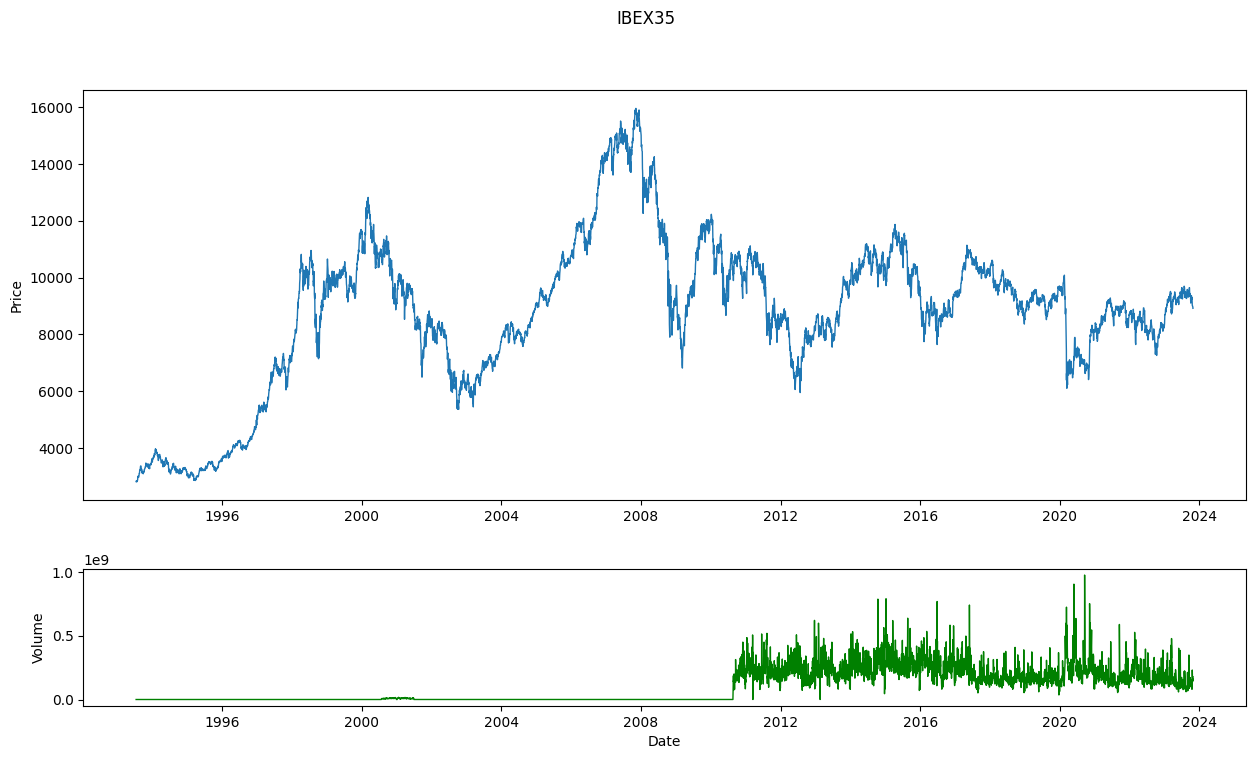

In [32]:
# Plot the adjusted close price of the ^IBEX
fig, axs = plt.subplots(2,1,gridspec_kw={'height_ratios': [3,1],'hspace':0.25},figsize=(15, 8))

fig.suptitle("IBEX35")
axs[0].set_ylabel('Price')
axs[0].plot(ibex35['Adj Close'],linewidth=1)

axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].plot(ibex35['Volume'],linewidth=1,color='g')

plt.show()

In [33]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':3,'colspan':1}],[None],[None],[{'rowspan':1,'colspan':1}]])

fig.add_trace(go.Scatter(x=ibex35.index,y=ibex35['Adj Close'],mode="lines",name='IBEX35'),row=1, col=1)
fig.add_trace(go.Scatter(x=ibex35.index,y=ibex35['Volume'],mode="lines",name='Volume'),row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title="IBEX35")

fig.show()

In [13]:
# Add Technical Analysis Indicators

# Modified Moving Average 20
ibex35['MMA20'] = ibex35['Adj Close'].loc['2023'].rolling(20).mean() #Adj Close 20 MA

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=ibex35["Adj Close"].loc['2023'], window=20, window_dev=2)

# Bollinger Bands
ibex35['BB_Upper'] = indicator_bb.bollinger_hband()
ibex35['BB_Lower'] = indicator_bb.bollinger_lband()

# Initialize RSI Indicator
indicator_rsi = RSIIndicator(close=ibex35["Adj Close"].loc['2023'], window=14)

# RSI
ibex35['RSI'] = indicator_rsi.rsi()

# Daily Return
ibex35['Daily_Return'] = daily_return(ibex35["Adj Close"].loc['2023'])

# Cummulative Return
ibex35['Cummulative_Return'] = cumulative_return(ibex35["Adj Close"].loc['2023'])

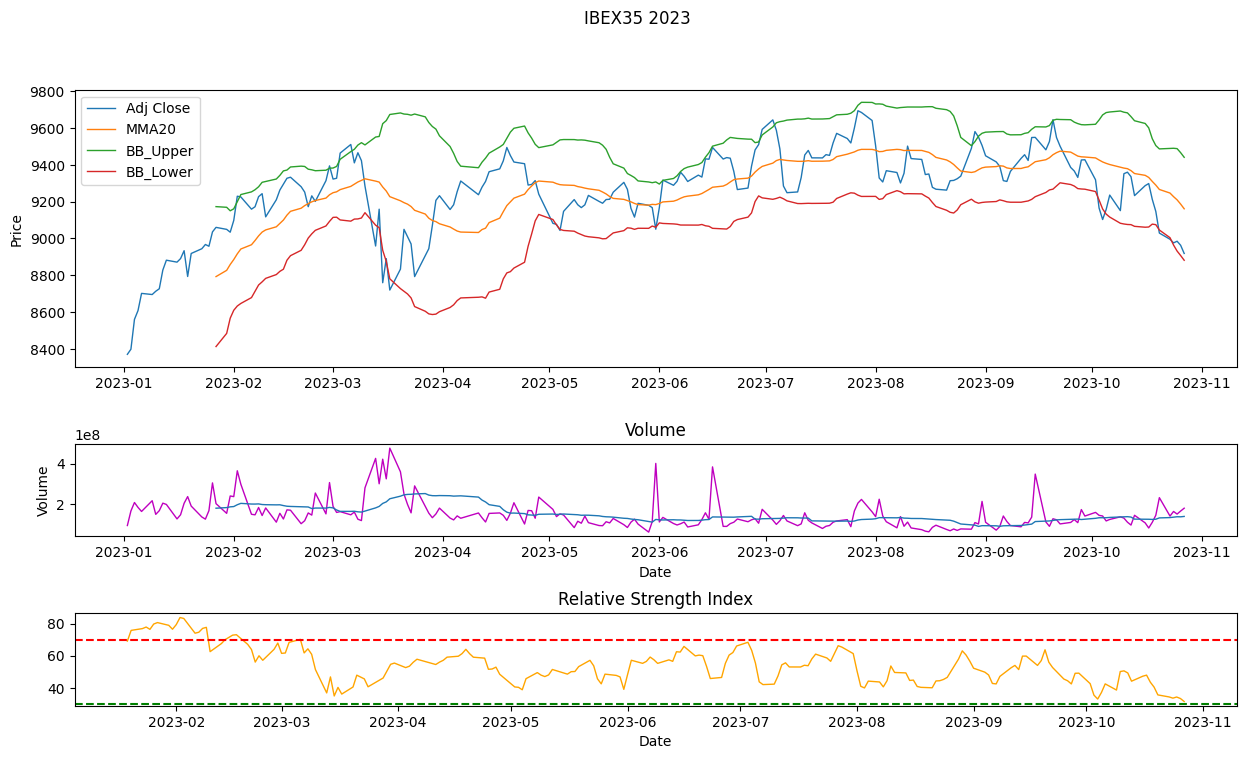

In [14]:
# Plot the adjusted close price of the ^IBEX for 2023
fig, axs = plt.subplots(3,1,gridspec_kw={'height_ratios': [3,1,1],'hspace':0.5},figsize=(15, 8))

# Graph 0
fig.suptitle("IBEX35 2023")
axs[0].set_ylabel('Price')
axs[0].plot(ibex35['Adj Close'].loc['2023'],linewidth=1)
axs[0].plot(ibex35['MMA20'],linewidth=1) 
axs[0].plot(ibex35['BB_Upper'],linewidth=1)
axs[0].plot(ibex35['BB_Lower'],linewidth=1)
axs[0].legend(['Adj Close','MMA20','BB_Upper','BB_Lower'])

# Graph 1
axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].set_title('Volume')
axs[1].plot(ibex35['Volume'].loc['2023'],linewidth=1,color='m')
axs[1].plot(ibex35['Volume'].loc['2023'].rolling(20).mean(),linewidth=1) #Volume 20 MMA

# Graph 2
axs[2].set_title('Relative Strength Index')
axs[2].set_xlabel("Date")
axs[2].plot(ibex35['RSI'],color='orange',linewidth=1)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
axs[2].axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
axs[2].axhline(70, linestyle='--', linewidth=1.5, color='red')

plt.show()

In [15]:
ibex35.tail(10)

Open         High  ...  Daily_Return  Cummulative_Return
Date                                  ...                                  
2023-10-16  9244.799805  9306.000000  ...      0.587023           10.960959
2023-10-17  9268.400391  9323.400391  ...      0.122755           11.097169
2023-10-18  9278.200195  9305.700195  ...     -0.922727           10.072045
2023-10-19  9176.799805  9189.700195  ...     -0.715321            9.284677
2023-10-20  9067.099609  9098.299805  ...     -1.286791            7.878411
2023-10-23  9028.700195  9037.000000  ...     -0.372126            7.476968
2023-10-24  9004.200195  9029.000000  ...     -0.219001            7.241593
2023-10-25  8961.799805  9000.799805  ...      0.100270            7.349124
2023-10-26  8926.900391  8978.500000  ...     -0.244858            7.086271
2023-10-27  9015.700195  9037.299805  ...     -0.496497            6.554591

[10 rows x 12 columns]

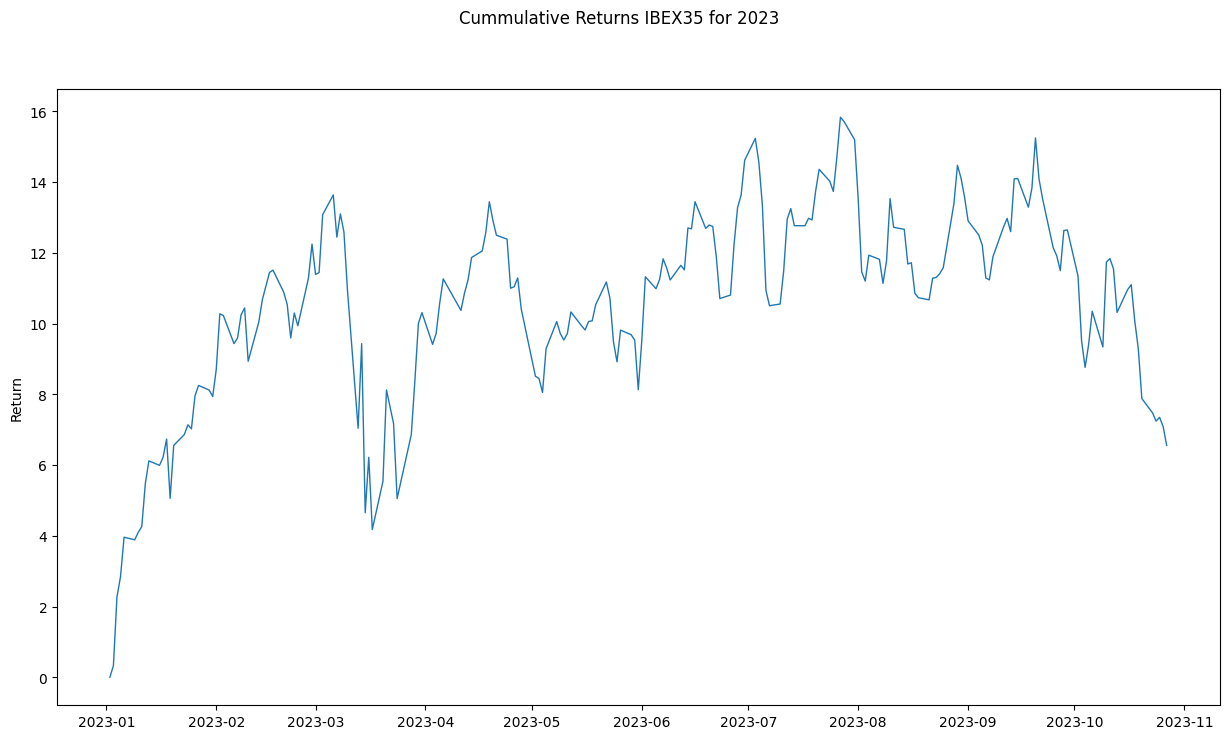

In [25]:
# Plot Cummulative Returns ^IBEX for 2023
fig, axs = plt.subplots(figsize=(15, 8))

# Graph
fig.suptitle("Cummulative Returns IBEX35 for 2023")
axs.set_ylabel('Return')
axs.plot(ibex35['Cummulative_Return'].loc['2023'],linewidth=1)

plt.show()